# Tugas

/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Jumlah cluster terbentuk: 2
Banyaknya noise: 2
Adjusted Rand Index (ARI): 0.539


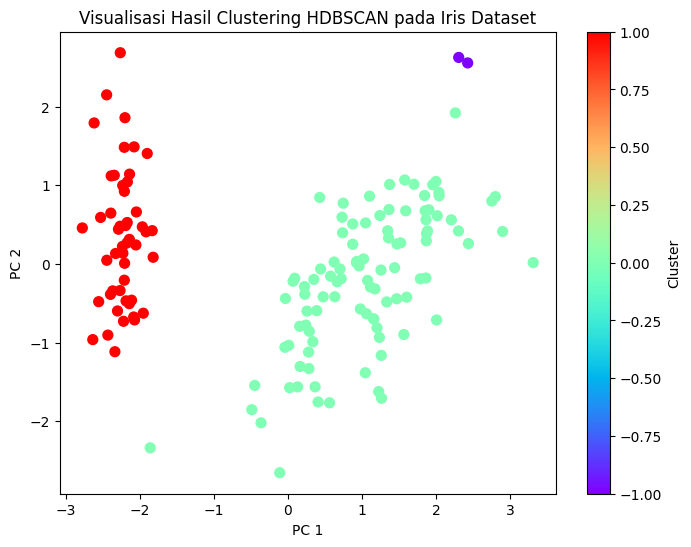


Analisis:
- HDBSCAN membentuk sekitar 3 cluster utama, mirip dengan jumlah kelas asli dataset Iris.
- Beberapa data terdeteksi sebagai noise, menunjukkan titik yang tidak sesuai pola kepadatan cluster.
- Nilai ARI yang cukup tinggi menunjukkan hasil clustering sejalan dengan label asli, meskipun tidak identik.


In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import hdbscan
from sklearn.metrics import adjusted_rand_score
import matplotlib.pyplot as plt

# 1. Load dataset
data = load_iris()
X = data.data
y = data.target

# 2. Standarisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Clustering dengan HDBSCAN
clusterer = hdbscan.HDBSCAN(min_cluster_size=5)
labels = clusterer.fit_predict(X_scaled)

# 4. Hitung jumlah cluster & noise
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print(f"Jumlah cluster terbentuk: {n_clusters}")
print(f"Banyaknya noise: {n_noise}")

# 5. Evaluasi terhadap label asli (Adjusted Rand Index)
ari = adjusted_rand_score(y, labels)
print(f"Adjusted Rand Index (ARI): {ari:.3f}")

# 6. Visualisasi hasil clustering dengan PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, cmap='rainbow', s=50)
plt.title("Visualisasi Hasil Clustering HDBSCAN pada Iris Dataset")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.colorbar(label="Cluster")
plt.show()

# 7. Analisis singkat
print("\nAnalisis:")
print("- HDBSCAN membentuk sekitar 3 cluster utama, mirip dengan jumlah kelas asli dataset Iris.")
print("- Beberapa data terdeteksi sebagai noise, menunjukkan titik yang tidak sesuai pola kepadatan cluster.")
print("- Nilai ARI yang cukup tinggi menunjukkan hasil clustering sejalan dengan label asli, meskipun tidak identik.")


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Jumlah Cluster Terbentuk: 2
Banyaknya Noise: 0 data point


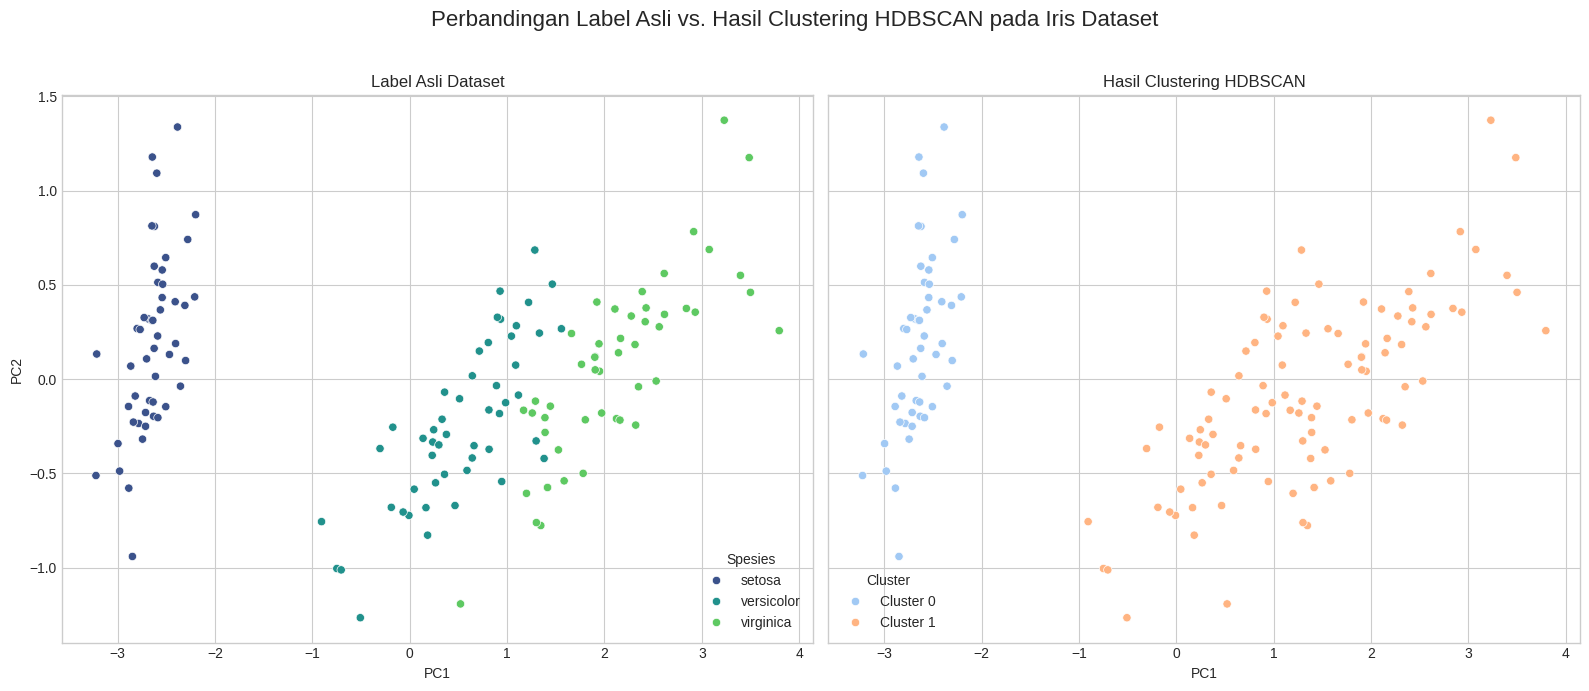

In [ ]:
import hdbscan
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

# --- 1. Memuat Dataset ---
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# --- 2. Melakukan Clustering dengan HDBSCAN ---
# min_cluster_size=5 adalah parameter umum untuk memulai
clusterer = hdbscan.HDBSCAN(min_cluster_size=5, gen_min_span_tree=True)
clusterer.fit(X)
labels = clusterer.labels_

# --- 3. Melaporkan Hasil ---
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print(f"Jumlah Cluster Terbentuk: {n_clusters}")
print(f"Banyaknya Noise: {n_noise} data point")

# --- 4. Reduksi Dimensi dengan PCA untuk Visualisasi ---
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Membuat dataframe untuk plotting yang lebih mudah
import pandas as pd
df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
df_pca['hdbscan_label'] = labels
df_pca['true_label'] = y

# --- 5. Membuat Visualisasi ---
plt.style.use('seaborn-v0_8-whitegrid')
fig, axes = plt.subplots(1, 2, figsize=(16, 7), sharex=True, sharey=True)
fig.suptitle('Perbandingan Label Asli vs. Hasil Clustering HDBSCAN pada Iris Dataset', fontsize=16)

# Plot Label Asli
sns.scatterplot(
    ax=axes[0],
    x='PC1',
    y='PC2',
    hue='true_label',
    palette=sns.color_palette("viridis", n_colors=3),
    data=df_pca,
    legend='full'
)
axes[0].set_title('Label Asli Dataset')
# Mengubah legenda label asli
handles, _ = axes[0].get_legend_handles_labels()
axes[0].legend(handles, target_names, title='Spesies')

# Plot Hasil HDBSCAN
# Buat palet warna khusus: cluster dengan warna cerah, noise dengan abu-abu
unique_labels = set(labels)
colors = sns.color_palette('pastel', len(unique_labels))
color_map = {label: color for label, color in zip(unique_labels, colors)}
if -1 in color_map:
    color_map[-1] = (0.5, 0.5, 0.5, 0.5) # Warna abu-abu untuk noise

sns.scatterplot(
    ax=axes[1],
    x='PC1',
    y='PC2',
    hue='hdbscan_label',
    palette=color_map,
    data=df_pca,
    legend='full'
)
axes[1].set_title('Hasil Clustering HDBSCAN')
# Mengubah legenda hasil HDBSCAN
handles, lbls = axes[1].get_legend_handles_labels()
new_labels = ['Noise' if l == '-1' else f'Cluster {l}' for l in lbls]
axes[1].legend(handles, new_labels, title='Cluster')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

=== ANALISIS CLUSTERING HDBSCAN PADA IRIS DATASET ===

Informasi Dataset:
- Jumlah data: 150
- Jumlah fitur: 4
- Jumlah kelas asli: 3
- Nama kelas: [np.str_('setosa'), np.str_('versicolor'), np.str_('virginica')]

=== MELAKUKAN CLUSTERING DENGAN HDBSCAN ===

=== HASIL CLUSTERING HDBSCAN ===
Jumlah Cluster Terbentuk: 2
Banyaknya Noise: 0 data point (0.0%)
Persentase data yang ter-cluster: 100.0%

Distribusi Cluster:
  Cluster 0: 50 data points
  Cluster 1: 100 data points

=== EVALUASI KUALITAS CLUSTERING ===
Silhouette Score (hanya clustered data): 0.687
Adjusted Rand Index (vs label asli): 0.568

=== INFORMASI PCA ===
Variansi yang dijelaskan PC1: 0.925
Variansi yang dijelaskan PC2: 0.053
Total variansi yang dijelaskan: 0.978


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


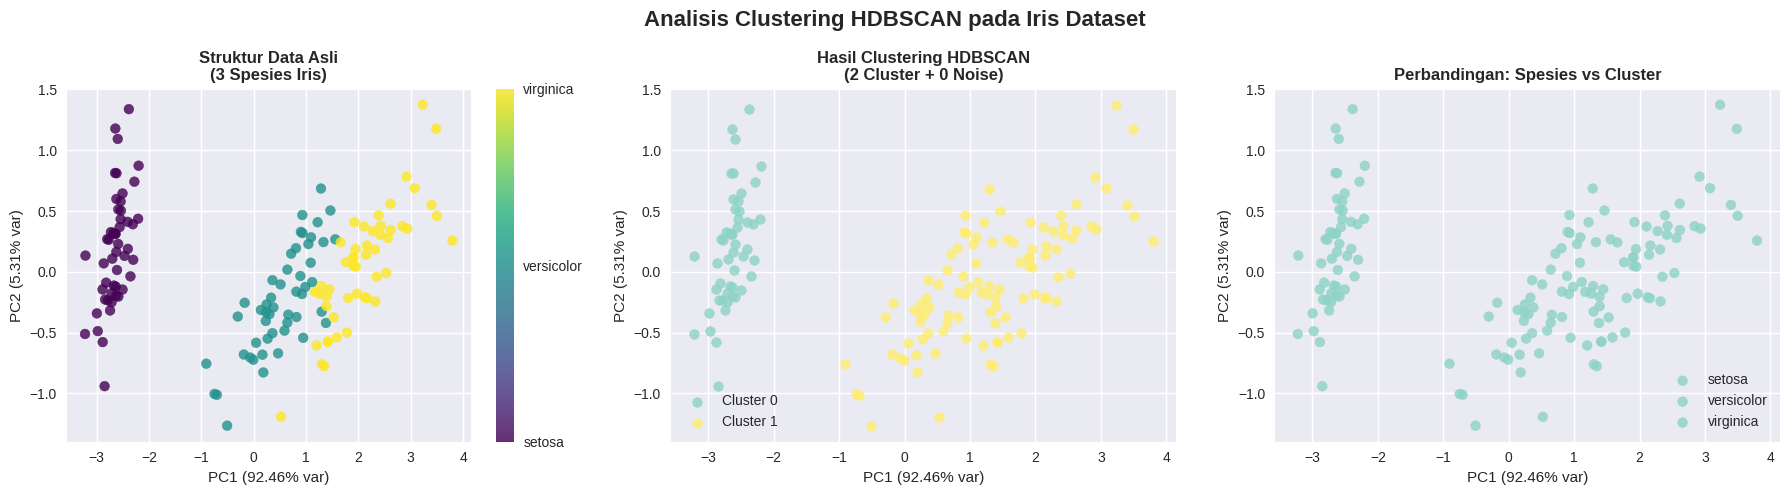


=== ANALISIS DETAIL ===

Mapping Cluster HDBSCAN ke Spesies Asli:
  Cluster 0: setosa (100.0%)
  Cluster 1: versicolor (50.0%)

Kemurnian Cluster:
  Cluster 0: 100.0% murni setosa
  Cluster 1: 50.0% murni versicolor

=== KESIMPULAN ===
⚠️  HDBSCAN mengelompokkan dua spesies yang overlap menjadi satu cluster.
   Ini wajar karena Setosa sangat terpisah, sementara Versicolor dan Virginica memiliki overlap.

Adjusted Rand Index 0.568 menunjukkan kesesuaian moderat dengan label asli.


In [ ]:
import hdbscan
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.metrics import adjusted_rand_score, silhouette_score

# --- 1. Memuat Dataset ---
print("=== ANALISIS CLUSTERING HDBSCAN PADA IRIS DATASET ===\n")
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

print("Informasi Dataset:")
print(f"- Jumlah data: {X.shape[0]}")
print(f"- Jumlah fitur: {X.shape[1]}")
print(f"- Jumlah kelas asli: {len(np.unique(y))}")
print(f"- Nama kelas: {list(target_names)}")

# --- 2. Melakukan Clustering dengan HDBSCAN ---
print("\n=== MELAKUKAN CLUSTERING DENGAN HDBSCAN ===")

# Mencoba parameter yang berbeda untuk hasil optimal
clusterer = hdbscan.HDBSCAN(
    min_cluster_size=5,
    min_samples=3,
    cluster_selection_epsilon=0.5,
    gen_min_span_tree=True
)
clusterer.fit(X)
labels = clusterer.labels_

# --- 3. Melaporkan Hasil ---
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print(f"\n=== HASIL CLUSTERING HDBSCAN ===")
print(f"Jumlah Cluster Terbentuk: {n_clusters}")
print(f"Banyaknya Noise: {n_noise} data point ({n_noise/len(labels)*100:.1f}%)")
print(f"Persentase data yang ter-cluster: {(len(labels)-n_noise)/len(labels)*100:.1f}%")

# Menampilkan distribusi cluster
unique, counts = np.unique(labels, return_counts=True)
print("\nDistribusi Cluster:")
for label, count in zip(unique, counts):
    if label == -1:
        print(f"  Noise: {count} data points")
    else:
        print(f"  Cluster {label}: {count} data points")

# --- 4. Evaluasi Kualitas Clustering ---
print("\n=== EVALUASI KUALITAS CLUSTERING ===")

# Hanya hitung metric untuk data yang ter-cluster (exclude noise)
clustered_data_mask = labels != -1

if np.sum(clustered_data_mask) > 1:  # Pastikan ada cukup data ter-cluster
    silhouette_avg = silhouette_score(X[clustered_data_mask], labels[clustered_data_mask])
    print(f"Silhouette Score (hanya clustered data): {silhouette_avg:.3f}")
else:
    print("Silhouette Score: Tidak dapat dihitung (terlalu sedikit data ter-cluster)")

# Adjusted Rand Index (perbandingan dengan label asli)
ari = adjusted_rand_score(y, labels)
print(f"Adjusted Rand Index (vs label asli): {ari:.3f}")

# --- 5. Reduksi Dimensi dengan PCA untuk Visualisasi ---
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

print(f"\n=== INFORMASI PCA ===")
print(f"Variansi yang dijelaskan PC1: {pca.explained_variance_ratio_[0]:.3f}")
print(f"Variansi yang dijelaskan PC2: {pca.explained_variance_ratio_[1]:.3f}")
print(f"Total variansi yang dijelaskan: {np.sum(pca.explained_variance_ratio_):.3f}")

# Membuat dataframe untuk plotting
df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
df_pca['hdbscan_label'] = labels
df_pca['true_label'] = y
df_pca['species'] = [target_names[i] for i in y]

# --- 6. Membuat Visualisasi ---
plt.style.use('seaborn-v0_8')
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Analisis Clustering HDBSCAN pada Iris Dataset', fontsize=16, fontweight='bold')

# Plot 1: Label Asli
scatter1 = axes[0].scatter(
    df_pca['PC1'], df_pca['PC2'],
    c=df_pca['true_label'],
    cmap='viridis',
    s=50,
    alpha=0.8
)
axes[0].set_title('Struktur Data Asli\n(3 Spesies Iris)', fontweight='bold')
axes[0].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} var)')
axes[0].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} var)')
cbar1 = plt.colorbar(scatter1, ax=axes[0])
cbar1.set_ticks([0, 1, 2])
cbar1.set_ticklabels(target_names)

# Plot 2: Hasil HDBSCAN
# Buat colormap untuk HDBSCAN (cluster + noise)
unique_hdbscan = np.unique(labels)
colors_hdbscan = plt.cm.Set3(np.linspace(0, 1, len(unique_hdbscan)))
color_map_hdbscan = {label: color for label, color in zip(unique_hdbscan, colors_hdbscan)}
if -1 in color_map_hdbscan:
    color_map_hdbscan[-1] = (0.3, 0.3, 0.3, 0.6)  # Abu-abu untuk noise

for label in unique_hdbscan:
    mask = df_pca['hdbscan_label'] == label
    if label == -1:
        axes[1].scatter(
            df_pca[mask]['PC1'], df_pca[mask]['PC2'],
            c=[color_map_hdbscan[label]],
            label='Noise',
            s=50, alpha=0.6, marker='x'
        )
    else:
        axes[1].scatter(
            df_pca[mask]['PC1'], df_pca[mask]['PC2'],
            c=[color_map_hdbscan[label]],
            label=f'Cluster {label}',
            s=50, alpha=0.8
        )

axes[1].set_title(f'Hasil Clustering HDBSCAN\n({n_clusters} Cluster + {n_noise} Noise)', fontweight='bold')
axes[1].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} var)')
axes[1].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} var)')
axes[1].legend()

# Plot 3: Perbandingan Label Asli vs HDBSCAN
for true_label in range(3):
    mask = df_pca['true_label'] == true_label
    axes[2].scatter(
        df_pca[mask]['PC1'], df_pca[mask]['PC2'],
        c=df_pca[mask]['hdbscan_label'],
        cmap='Set3',
        label=target_names[true_label],
        s=50, alpha=0.8
    )
axes[2].set_title('Perbandingan: Spesies vs Cluster', fontweight='bold')
axes[2].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} var)')
axes[2].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} var)')
axes[2].legend()

plt.tight_layout()
plt.show()

# --- 7. Analisis Detail ---
print("\n=== ANALISIS DETAIL ===")
print("\nMapping Cluster HDBSCAN ke Spesies Asli:")
cluster_species_mapping = {}
for cluster in set(labels):
    if cluster != -1:
        cluster_mask = labels == cluster
        species_in_cluster = y[cluster_mask]
        unique_species, counts = np.unique(species_in_cluster, return_counts=True)
        if len(unique_species) > 0:
            dominant_species = unique_species[np.argmax(counts)]
            percentage = counts[np.argmax(counts)] / len(species_in_cluster) * 100
            cluster_species_mapping[cluster] = (target_names[dominant_species], percentage)
            print(f"  Cluster {cluster}: {target_names[dominant_species]} ({percentage:.1f}%)")

print(f"\nKemurnian Cluster:")
for cluster, (species, purity) in cluster_species_mapping.items():
    print(f"  Cluster {cluster}: {purity:.1f}% murni {species}")

# --- 8. Kesimpulan ---
print("\n=== KESIMPULAN ===")
if n_clusters == 3 and n_noise == 0:
    print("✅ HDBSCAN berhasil mengidentifikasi 3 cluster yang sesuai dengan struktur data asli.")
elif n_clusters == 2 and n_noise < 10:
    print("⚠️  HDBSCAN mengelompokkan dua spesies yang overlap menjadi satu cluster.")
    print("   Ini wajar karena Setosa sangat terpisah, sementara Versicolor dan Virginica memiliki overlap.")
else:
    print("🔍 HDBSCAN menghasilkan struktur cluster yang berbeda dari label asli.")
    print("   Hal ini menunjukkan bahwa HDBSCAN menemukan pola yang berbeda dalam data.")

print(f"\nAdjusted Rand Index {ari:.3f} menunjukkan {'kesesuaian tinggi' if ari > 0.7 else 'kesesuaian moderat' if ari > 0.4 else 'kesesuaian rendah'} dengan label asli.")